# Weather Prediction with Clustering Analysis

### Perform Cluster Analysis and Decision Tree induction algorithm on a weather forecast problem. It is a binary classification problem to predict whether or not a location will get rain the next day.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans

In [2]:
# Import the training dataset
Weather = pd.read_csv("Weather Forecast Training.csv")
Weather.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday,RainTomorrow
0,NorahHead,18.9,23.7,0.0,NaN,NaN,SSE,41.0,SSE,28.0,55.0,1026.0,NaN,22.4,No,Yes
1,Nuriootpa,11.1,20.8,0.0,4.8,8.3,W,39.0,WSW,26.0,48.0,1014.4,7.0,19.5,No,No
2,GoldCoast,15.9,19.5,17.6,NaN,NaN,SE,44.0,SW,9.0,99.0,1028.5,NaN,17.8,Yes,Yes
3,Bendigo,0.0,14.9,0.0,NaN,NaN,WSW,35.0,WNW,19.0,55.0,1023.0,4.0,14.2,No,Yes
4,Walpole,9.1,22.7,0.0,NaN,NaN,NNE,41.0,ESE,7.0,40.0,1027.1,NaN,22.5,No,No


In [3]:
Weather.shape

(51978, 16)

In [4]:
# Check df types
Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51978 entries, 0 to 51977
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       51978 non-null  object 
 1   MinTemp        51694 non-null  float64
 2   MaxTemp        51849 non-null  float64
 3   Rainfall       51231 non-null  float64
 4   Evaporation    29425 non-null  float64
 5   Sunshine       27103 non-null  float64
 6   WindGustDir    48380 non-null  object 
 7   WindGustSpeed  48407 non-null  float64
 8   WindDir        50465 non-null  object 
 9   WindSpeed      50954 non-null  float64
 10  Humidity       50549 non-null  float64
 11  Pressure       46912 non-null  float64
 12  Cloud          31848 non-null  float64
 13  Temp           50915 non-null  float64
 14  RainToday      51231 non-null  object 
 15  RainTomorrow   51978 non-null  object 
dtypes: float64(11), object(5)
memory usage: 6.3+ MB


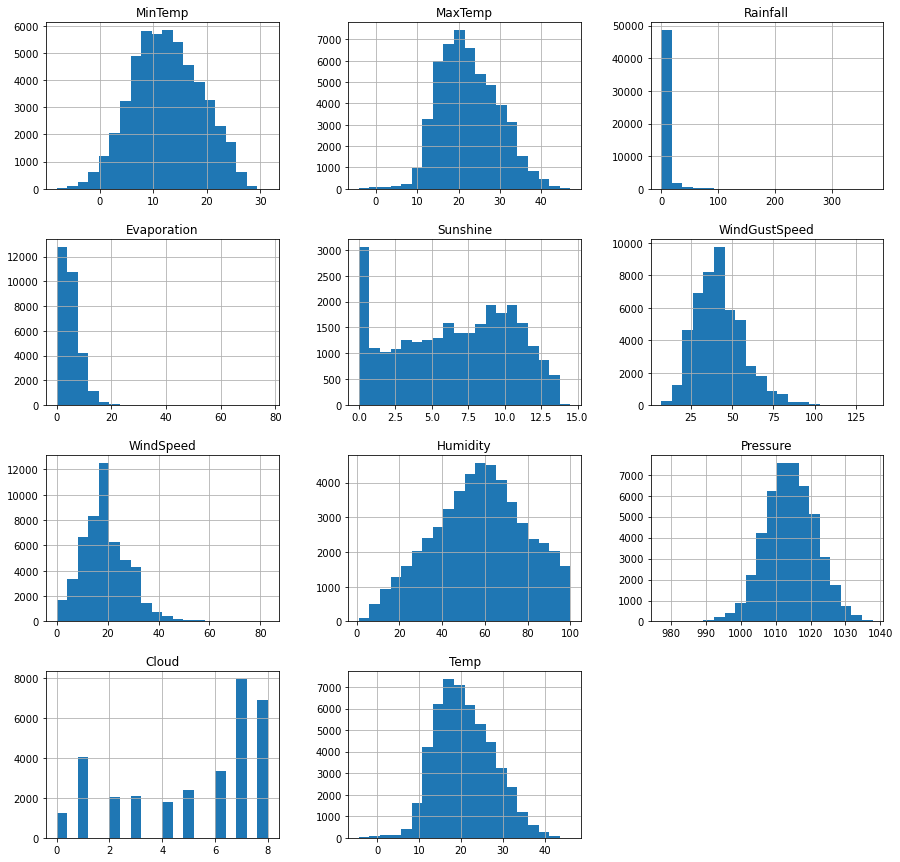

In [5]:
# Visualize the Data 

Weather.hist(bins=20,figsize = (15,15));

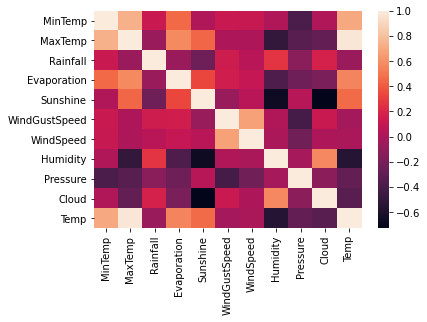

In [6]:
Weather.corr()
ax = sns.heatmap(Weather.corr())

In [7]:
# Preprocessing - Remove null values
Weather.isnull().sum(axis=0)

Location             0
MinTemp            284
MaxTemp            129
Rainfall           747
Evaporation      22553
Sunshine         24875
WindGustDir       3598
WindGustSpeed     3571
WindDir           1513
WindSpeed         1024
Humidity          1429
Pressure          5066
Cloud            20130
Temp              1063
RainToday          747
RainTomorrow         0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer 
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

imp = imp.fit(Weather[['MinTemp']])
Weather['MinTemp'] = imp.transform(Weather[['MinTemp']]).ravel()

imp = imp.fit(Weather[['MaxTemp']])
Weather['MaxTemp'] = imp.transform(Weather[['MaxTemp']]).ravel()

imp = imp.fit(Weather[['Rainfall']])
Weather['Rainfall'] = imp.transform(Weather[['Rainfall']]).ravel()

imp = imp.fit(Weather[['Evaporation']])
Weather['Evaporation'] = imp.transform(Weather[['Evaporation']]).ravel()

imp = imp.fit(Weather[['Sunshine']])
Weather['Sunshine'] = imp.transform(Weather[['Sunshine']]).ravel()

In [6]:
Weather.dropna(subset=['WindGustDir'], how='all', inplace=True)

In [7]:
imp = imp.fit(Weather[['WindGustSpeed']])
Weather['WindGustSpeed'] = imp.transform(Weather[['WindGustSpeed']]).ravel()

In [8]:
Weather.dropna(subset=['WindDir'], how='all', inplace=True)

In [9]:
imp = imp.fit(Weather[['Humidity']])
Weather['Humidity'] = imp.transform(Weather[['Humidity']]).ravel()

imp = imp.fit(Weather[['Pressure']])
Weather['Pressure'] = imp.transform(Weather[['Pressure']]).ravel()

imp = imp.fit(Weather[['Cloud']])
Weather['Cloud'] = imp.transform(Weather[['Cloud']]).ravel()

imp = imp.fit(Weather[['Temp']])
Weather['Temp'] = imp.transform(Weather[['Temp']]).ravel()

In [10]:
Weather.dropna(subset=['RainToday'], how='all', inplace=True)
Weather.dropna(subset=['RainTomorrow'], how='all', inplace=True)

In [11]:
Weather.isnull().sum(axis=0)

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir          0
WindSpeed        0
Humidity         0
Pressure         0
Cloud            0
Temp             0
RainToday        0
RainTomorrow     0
dtype: int64

In [23]:
# Preprocessing - drop columns
Weather.select_dtypes('object').columns

Index(['Location', 'WindGustDir', 'WindDir', 'RainToday', 'RainTomorrow'], dtype='object')

In [24]:
Weather.drop(['Location', 'WindGustDir', 'WindDir', 'RainToday', 'RainTomorrow'], inplace=True, axis=1)

In [25]:
# Preprocessing - scaling & normalizing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(Weather)
df_normalized = pd.DataFrame(np_scaled, columns=Weather.columns, index=Weather.index)
df_normalized.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp
count,47345.000000,47345.000000,47345.000000,47345.000000,47345.000000,47345.000000,47345.000000,47345.000000,47345.000000,47345.000000,47345.000000
mean,0.511449,0.522804,0.012951,0.067474,0.452502,0.274051,0.240616,0.565545,0.611436,0.645435,0.501598
std,0.166824,0.140671,0.039176,0.040054,0.198759,0.113726,0.123532,0.220420,0.115019,0.257778,0.138393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.388601,0.416830,0.000000,0.051746,0.450385,0.187500,0.152778,0.414141,0.537068,0.625000,0.398020
50%,0.505181,0.510763,0.000000,0.066980,0.450385,0.250000,0.236111,0.565692,0.611624,0.645784,0.491089
75%,0.634715,0.624266,0.007902,0.066980,0.510345,0.335938,0.305556,0.727273,0.683690,0.875000,0.598020
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# KMeans Clustering using *sklearn*

kmeans = KMeans(n_clusters=2, n_init=25, max_iter=100, random_state=6)
kmeans.fit(df_normalized)
kmeans.__dict__.keys()
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [27]:
# Scaling continuous features

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(Weather)
transformed_data = mms.transform(Weather)

In [28]:
# Elbow Method

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(transformed_data)
    Sum_of_squared_distances.append(km.inertia_)

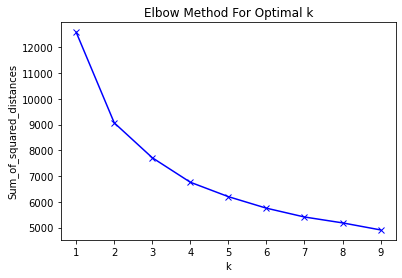

In [29]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# k=5

In [ ]:
# Dendrogram

from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(transformed_data)

fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(False)
ax.set_title('Cluster Dendrogram', fontsize = 25)
ax = dendrogram(linkage_matrix, orientation='top', labels=transformed_data.index)
plt.xticks(fontsize=8)
plt.show()

# Decision Tree Model

In [1]:
# Import libraries

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn import tree
np.random.seed(66)

In [8]:
# Import training datasets
test_raw = pd.read_csv('~/Desktop/CISC520/520 HW1/Weather Forecast Testing.csv')
test_n = len(test_raw)
train_raw = pd.read_csv('~/Desktop/CISC520/520 HW1/Weather Forecast Training.csv')
df = pd.concat([test_raw, train_raw])
df = df.drop(columns=['ID', 'RainTomorrow'])

In [9]:
# Check missing values
df.isna().sum() / len(df) * 100

Location          0.000000
MinTemp           0.509450
MaxTemp           0.226251
Rainfall          1.397525
Evaporation      43.201687
Sunshine         47.665148
WindGustDir       6.967617
WindGustSpeed     6.912208
WindDir           2.924337
WindSpeed         1.977775
Humidity          2.736563
Pressure          9.787293
Cloud            38.708982
Temp              2.047036
RainToday         1.397525
dtype: float64

In [10]:
# Remove missinng values
df = df.drop(columns=['Cloud', 'Sunshine', 'Evaporation'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64972 entries, 0 to 51977
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       64972 non-null  object 
 1   MinTemp        64641 non-null  float64
 2   MaxTemp        64825 non-null  float64
 3   Rainfall       64064 non-null  float64
 4   WindGustDir    60445 non-null  object 
 5   WindGustSpeed  60481 non-null  float64
 6   WindDir        63072 non-null  object 
 7   WindSpeed      63687 non-null  float64
 8   Humidity       63194 non-null  float64
 9   Pressure       58613 non-null  float64
 10  Temp           63642 non-null  float64
 11  RainToday      64064 non-null  object 
dtypes: float64(8), object(4)
memory usage: 6.4+ MB


In [12]:
num_df = df.select_dtypes('float64')
cat_df = df.select_dtypes('object')

In [13]:
# Impute missing values with k-Nearest Neighbors
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
imp_df = imputer.fit_transform(num_df)

In [14]:
num_df = pd.DataFrame(imp_df, columns=num_df.columns)

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imp_cat_df = imputer.fit_transform(cat_df)
cat_df = pd.DataFrame(imp_cat_df, columns=cat_df.columns)

In [16]:
cat_df = pd.get_dummies(cat_df)

In [21]:
df2 = pd.concat([num_df, cat_df], axis=1)
test = df2[:test_n]
train = df2[test_n:]

In [25]:
df2.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed,Humidity,Pressure,Temp,Location_Adelaide,Location_Albany,...,WindDir_S,WindDir_SE,WindDir_SSE,WindDir_SSW,WindDir_SW,WindDir_W,WindDir_WNW,WindDir_WSW,RainToday_No,RainToday_Yes
0,15.3,21.5,4.4,70.0,22.0,69.0,997.6,19.8,0,0,...,0,0,0,0,0,1,0,0,0,1
1,7.1,11.0,38.8,48.0,19.0,46.0,1014.0,10.7,0,0,...,0,0,0,0,1,0,0,0,0,1
2,3.6,16.6,0.2,37.0,15.0,48.0,1016.6,15.4,0,0,...,0,0,0,0,0,0,0,0,1,0
3,17.6,37.4,0.0,37.0,19.0,11.0,1010.4,34.6,0,0,...,0,0,0,0,0,0,0,0,1,0
4,11.4,25.6,0.0,31.0,13.0,52.0,1016.4,24.3,0,0,...,0,0,1,0,0,0,0,0,1,0


In [22]:
# Train the data
from sklearn import tree
X = train
y = train_raw['RainTomorrow']

# Use Classifier model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [23]:
clf

DecisionTreeClassifier()

In [24]:
# Predict "RainTomorrow"
RT = clf.predict(test)
RT

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

# Naive Bayes Classification

In [ ]:
# Naive Bayes Classification

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb = nb.fit(X, y)
nb.predict(test)

# Clustering Analysis #2

In [ ]:
# Once again with Clustering with this trained model

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.predict(test)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


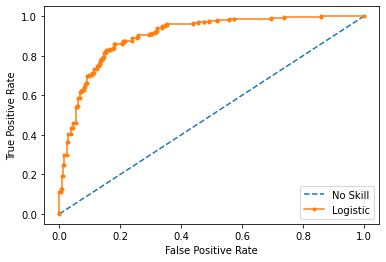

In [53]:
# Try plotting ROC & AUC curves

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [48]:
df = pd.DataFrame(test_raw)
df['RainTomorrow'] = RT 
df

,ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday,RainTomorrow
0,1,Perth,15.3,21.5,4.4,2.4,1.4,NW,70.0,W,22.0,69.0,997.6,7.0,19.8,Yes,Yes
1,2,Portland,7.1,11.0,38.8,1.2,5.8,SSE,48.0,SW,19.0,46.0,1014.0,4.0,10.7,Yes,No
2,3,Hobart,3.6,16.6,0.2,2.8,9.3,NW,37.0,N,15.0,48.0,1016.6,5.0,15.4,No,Yes
3,4,Woomera,17.6,37.4,0.0,34.0,NaN,NNW,37.0,NW,19.0,11.0,1010.4,2.0,34.6,No,No
4,5,Townsville,11.4,25.6,0.0,6.0,2.8,ESE,31.0,SSE,13.0,52.0,1016.4,7.0,24.3,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12989,12990,Penrith,9.4,17.0,0.2,NaN,NaN,SW,41.0,SW,19.0,35.0,NaN,NaN,16.1,No,No
12990,12991,Canberra,8.4,29.3,0.0,4.8,11.6,NNW,41.0,NW,26.0,23.0,1017.9,3.0,27.7,No,No
12991,12992,Dartmoor,10.4,20.4,0.0,2.6,3.0,WNW,52.0,NNW,26.0,45.0,1013.3,NaN,18.6,No,No
12992,12993,PearceRAAF,7.6,20.3,1.0,NaN,10.2,WNW,37.0,NNW,20.0,47.0,1020.3,4.0,20.0,No,No


In [50]:
# Export new data
df.to_csv(r'Desktop\test_raw.csv', index = False)

# Interpretation

The first machine learning algorithm I performed on the training data set is Clustering Analysis.
Clustering Analysis is a technique for unsupervised learning. 
By using the scikit-learn library, I was able to find natural feature groups of the data set.
K-means algorithm allowed me to categorize the data in to k-number of subgroups. In this data set, I used the number of cluster = 2, random state = 6.
In order to find the optimal number of clusters, I used the Elbow method for determination.
By plotting, it looks like the optimal number of cluster for this data set is 5. However, we want the predicted values to be 0 or 1 (Yes or No). 

The second machine learning algorithm I performed here is Decision Tree model, by training the train data set to construct a general model to apply on the test data in order to predict our target variable "RainTomorrow".
Decision Tree model is an important method for machine learning that is simple yet accurate.
By using various functions from the scikit-learn library, I constructed a trained model by training the "training data" of weather forecast. After careful preprocessing steps; taking care of missing values & categorical variables, etc. With Decision tree classifier, I was able to predict the target values "RainTomorrow", followed by the plot for ROC & AUC curves. ROC(receiver operating characteristic) curve is a probability curve which is used for visualization of the diagnosis of a binary classification system, while AUC(Area Under The Curve) tells degree or measure of separability. 

The third method I used to predict our target variable "RainTomorrow" is Naive Bayes Classification.
Naive Bayes Classification is a technique that used the Bayes Theorem for feature classification.
I constructed a model by using the scikit-learn library, and predicted the target variable "RainTomorrow".

After performing multiple machine learning techniques to predict the target variables "RainTomorrow", I added the column "RainTomorrow" in the test data set then expoted it as csv file.